# First Task

T and set of stations D

Entry: set of requests R (t1, t2, d1, d2)

Output: stair S in R maximizing the clique

### Tasks

1) générer le set R de requests

2) plot les rectangles

3) résoudre le clique

4) afficher le stair

In [87]:
# Time limit
T = 20

# Stations number
D = 10

# Requests number
R = 10

# Generate random Requests

In [88]:
from random import seed
from random import randint

# seed random number generator
seed(1)

requests_list = []

for i in range(R):
    t1 = randint(0,T-1)
    t2 = randint(t1+1,T)
    d1 = randint(0,D-1)
    d2 = randint(d1+1,D)
    r = (d1,d2,t1,t2)
    requests_list.append(r)
print(requests_list)

[(4, 5, 4, 7), (7, 10, 15, 19), (1, 9, 12, 16), (6, 7, 0, 13), (3, 8, 14, 17), (0, 1, 3, 14), (0, 7, 0, 18), (0, 9, 6, 13), (7, 9, 7, 20), (5, 7, 17, 18)]


# Plot the rectangles

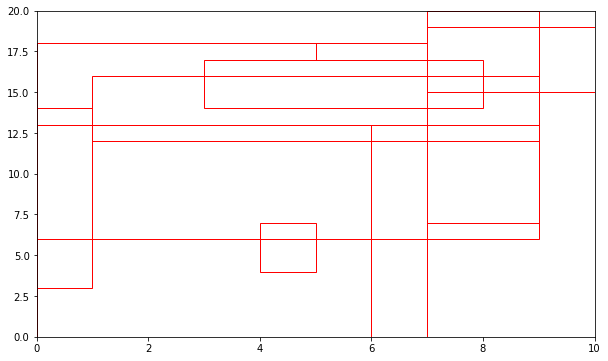

In [102]:
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# Create the window itself

fig, ax = plt.subplots(figsize=(10, 6))

xlim(0,10)
ylim(0,20)

# Create the rectangles "patchs"
for i in range(R):
    a = requests_list[i]
    rect = patches.Rectangle((a[0],a[2]),a[1]-a[0],a[3]-a[2], linewidth=1, edgecolor='r', facecolor='none')

# Add the rectangle to the Axes
    ax.add_patch(rect)

# Clique creation in the graph

r et s sont COMPATIBLES si r_left < s_left et r_bot < s_top

                    et si r_top > s_bot si s_left < r_right
                    
dans requests_list, ça donne (d1,d2,t1,t2) = (r_left, r_right, r_bot, r_top)

In [90]:
# Les nodes sont dans V
V = requests_list
E = []

for i in range(R):
    for j in range(R-1-i):
        V1 = V[i]
        V2 = V[R-j-1]
        print(i,R-j-1)  # On les a bien tous
        print(V1,V2)
        
        # On regarde qui est le plus à gauche, on renomme si besoin
        if V1[0] > V2[0]:
            a = V2
            V2 = V1
            V1 = a
            print(V1,V2)
        if V1[2] < V2[3]:
            if V1[3] < V2[2]:
                # Add V1V2 au graphe
                E.append((i,R-j-1))
            elif V1[1] > V2[0]:
                # Add V1V2 au graphe
                E.append((i,R-j-1))
        print(E)

0 9
(4, 5, 4, 7) (5, 7, 17, 18)
[(0, 9)]
0 8
(4, 5, 4, 7) (7, 9, 7, 20)
[(0, 9)]
0 7
(4, 5, 4, 7) (0, 9, 6, 13)
(0, 9, 6, 13) (4, 5, 4, 7)
[(0, 9), (0, 7)]
0 6
(4, 5, 4, 7) (0, 7, 0, 18)
(0, 7, 0, 18) (4, 5, 4, 7)
[(0, 9), (0, 7), (0, 6)]
0 5
(4, 5, 4, 7) (0, 1, 3, 14)
(0, 1, 3, 14) (4, 5, 4, 7)
[(0, 9), (0, 7), (0, 6)]
0 4
(4, 5, 4, 7) (3, 8, 14, 17)
(3, 8, 14, 17) (4, 5, 4, 7)
[(0, 9), (0, 7), (0, 6)]
0 3
(4, 5, 4, 7) (6, 7, 0, 13)
[(0, 9), (0, 7), (0, 6)]
0 2
(4, 5, 4, 7) (1, 9, 12, 16)
(1, 9, 12, 16) (4, 5, 4, 7)
[(0, 9), (0, 7), (0, 6)]
0 1
(4, 5, 4, 7) (7, 10, 15, 19)
[(0, 9), (0, 7), (0, 6), (0, 1)]
1 9
(7, 10, 15, 19) (5, 7, 17, 18)
(5, 7, 17, 18) (7, 10, 15, 19)
[(0, 9), (0, 7), (0, 6), (0, 1)]
1 8
(7, 10, 15, 19) (7, 9, 7, 20)
[(0, 9), (0, 7), (0, 6), (0, 1), (1, 8)]
1 7
(7, 10, 15, 19) (0, 9, 6, 13)
(0, 9, 6, 13) (7, 10, 15, 19)
[(0, 9), (0, 7), (0, 6), (0, 1), (1, 8), (1, 7)]
1 6
(7, 10, 15, 19) (0, 7, 0, 18)
(0, 7, 0, 18) (7, 10, 15, 19)
[(0, 9), (0, 7), (0, 6), (0, 1), (1

In [91]:
print(V)
print(E)

[(4, 5, 4, 7), (7, 10, 15, 19), (1, 9, 12, 16), (6, 7, 0, 13), (3, 8, 14, 17), (0, 1, 3, 14), (0, 7, 0, 18), (0, 9, 6, 13), (7, 9, 7, 20), (5, 7, 17, 18)]
[(0, 9), (0, 7), (0, 6), (0, 1), (1, 8), (1, 7), (1, 5), (1, 4), (1, 3), (1, 2), (2, 9), (2, 8), (2, 7), (2, 6), (2, 4), (2, 3), (3, 7), (3, 6), (4, 9), (4, 8), (4, 7), (4, 6), (5, 9), (5, 7), (5, 6), (6, 9), (6, 7), (7, 9), (7, 8)]


# Crique Resolution

Avec Gurobi ?!

In [104]:
# CODE IDEA TO FIND MAX SIZE OF A CLIQUE

##### MANQUE

#  garder le numéro des vertices en tête

# Python3 implementation of the approach 
MAX = R; 
n = 0; 
  
# Stores the vertices 
store = [0] * MAX; 
  
# Graph 
graph = [[0 for i in range(MAX)] for j in range(MAX)]; 
# Degree of the vertices 
d = [0] * MAX; 

# Function to check if the given set of 
# vertices in store array is a clique or not 
def is_clique(b): 
  
    # Run a loop for all set of edges 
    for i in range(1, b): 
        for j in range(i + 1, b): 
  
            # If any edge is missing 
            if (graph[store[i]][store[j]] == 0): 
                return False; 
      
    return True; 
  
# Function to find all the sizes 
# of maximal cliques 
def maxCliques(i, l): 
  
    # Maximal clique size 
    max_ = 0; 
  
    # Check if any vertices from i+1 
    # can be inserted 
    for j in range(i + 1, n + 1): 
  
        # Add the vertex to store 
        store[l] = j; 
  
        # If the graph is not a clique of size k then 
        # it cannot be a clique by adding another edge 
        if (is_clique(l + 1)): 
  
            # Update max 
            max_ = max(max_, l); 
  
            # Check if another edge can be added 
            max_ = max(max_, maxCliques(j, l + 1)); 
          
    return max_; 
      
# HERE WE ENTER OUR GRAPH WITH THE EDGES
if __name__ == '__main__': 
    edges = E; 
    size = len(edges); 
    n = R-1; 
  
    for i in range(size): 
        # On remplit la matrice
        graph[edges[i][0]][edges[i][1]] = 1; 
        graph[edges[i][1]][edges[i][0]] = 1; 
        d[edges[i][0]] += 1; 
        d[edges[i][1]] += 1; 
      
    print(maxCliques(0, 1));

5
